In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\razan\Downloads\customer_orders.csv")

In [3]:
df

,CustomerID,Name,Age,Gender,City,OrderDate,Product,Quantity,Price,TotalAmount,Feedback,Membership
0,1001,Jane Doe,28.0,M,Mumbai,2023-10-17,NaN,2,1200.0,NaN,Excellent,Platinum
1,1002,Alex Jones,NaN,NaN,Mumbai,2023-10-30,Tablet,1,1200.0,NaN,NaN,Platinum
2,1003,Sara O'Hara,35.0,Male,Bangalore,2023-10-12,Mouse,1,750.0,NaN,Excellent,NaN
3,1004,Jane Verma,30.0,Male,Bangalore,2023-10-24,Headphones,1,1000.0,NaN,NaN,silver
4,1005,Jane Sharma,25.0,Male,Pune,2023-10-28,laptop,2,1000.0,NaN,NaN,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...
505,1337,Rohit Singh,40.0,f,Pune,2023-10-01,NaN,2,1000.0,NaN,Average,silver
506,1500,Alex Doe,NaN,NaN,Mumbai,2023-10-12,mobile,two,1000.0,NaN,Excellent,Silver
507,1374,John Smith,35.0,FEMALE,Mumbai,2023-10-05,Mobile,2,1200.0,NaN,Average,Platinum
508,1324,John Jones,28.0,M,new york,2023-10-16,Headphones,two,NaN,NaN,NaN,gold


# Basic Overview

In [5]:
df.describe()

,CustomerID,Age,Price,TotalAmount
count,510.000000,453.000000,407.000000,0.0
mean,1251.974510,30.624724,873.464373,NaN
std,144.400329,4.917956,267.300016,NaN
min,1001.000000,25.000000,500.000000,NaN
25%,1127.250000,25.000000,625.000000,NaN
50%,1252.500000,30.000000,1000.000000,NaN
75%,1375.750000,35.000000,1200.000000,NaN
max,1500.000000,40.000000,1200.000000,NaN


In [6]:
df.shape

(510, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   510 non-null    int64  
 1   Name         510 non-null    object 
 2   Age          453 non-null    float64
 3   Gender       434 non-null    object 
 4   City         510 non-null    object 
 5   OrderDate    510 non-null    object 
 6   Product      461 non-null    object 
 7   Quantity     468 non-null    object 
 8   Price        407 non-null    float64
 9   TotalAmount  0 non-null      float64
 10  Feedback     413 non-null    object 
 11  Membership   379 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 47.9+ KB


# Data Cleaning

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [11]:
df['Gender'].unique()

array(['M', nan, 'Male', 'f', 'FEMALE', 'male', 'Female'], dtype=object)

In [12]:
df['Gender'] = df['Gender'].replace({
    'female': 'Female', 'f': 'Female','FEMALE':'Female',
    'male': 'Male', 'M': 'Male'})

In [13]:
df['Quantity'].unique()

array(['2', '1', 'two', '3', nan], dtype=object)

In [14]:
df['Quantity'] = df['Quantity'].replace("two", 2)

In [15]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mode()[0]) 

In [16]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

In [17]:
df['TotalAmount'] = df['TotalAmount'].fillna(df['Price'] * df['Quantity'])

In [18]:
df['Membership'] = df['Membership'].fillna("None")

In [19]:
df['Product'].unique()

array([nan, 'Tablet', 'Mouse', 'Headphones', 'laptop', 'Mobile',
       'Keyboard', 'mobile', 'Laptop', 'Charger'], dtype=object)

In [20]:
df['Product']=df['Product'].replace({'laptop':'Laptop','mobile':'Mobile'})

In [21]:
df['City'].unique()

array(['Mumbai', 'Bangalore', 'Pune', 'delhi', 'Kolkata', 'new york',
       'Delhi', 'bangalore', 'New York'], dtype=object)

In [22]:
df['Membership'].unique()

array(['Platinum', 'None', 'silver', 'Silver', 'gold', 'Gold'],
      dtype=object)

In [23]:
df['Membership']=df['Membership'].str.title()

In [24]:
df['City']=df['City'].replace({'bangalore':'Bangalore','delhi':'Delhi','new york':'New York'})

# Data Analysis

In [26]:
# Total sales by product
product_sales = df.groupby("Product")["TotalAmount"].sum().sort_values(ascending=False)
product_sales

Product
Laptop        117050.0
Mobile         98450.0
Mouse          66800.0
Charger        63450.0
Keyboard       59200.0
Tablet         57350.0
Headphones     53200.0
Name: TotalAmount, dtype: float64

In [27]:
# Orders by city
city_orders = df["City"].value_counts()
city_orders

City
Delhi        120
New York     117
Bangalore    102
Mumbai        57
Pune          54
Kolkata       50
Name: count, dtype: int64

In [28]:
# Membership counts
membership_counts = df["Membership"].value_counts()
membership_counts

Membership
Gold        148
Silver      141
None        131
Platinum     80
Name: count, dtype: int64

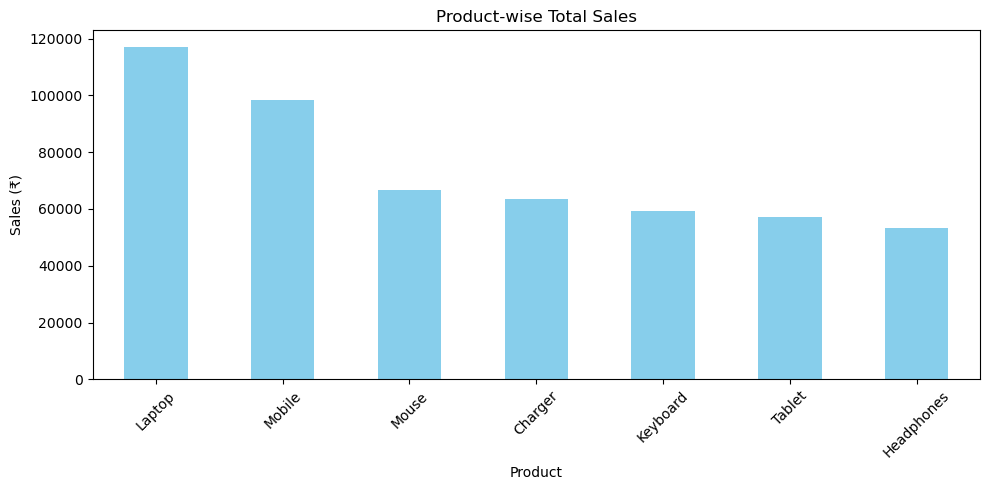

In [29]:
# 1. Product-wise Sales
plt.figure(figsize=(10,5))
product_sales.plot(kind='bar', color='skyblue')
plt.title("Product-wise Total Sales")
plt.ylabel("Sales (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

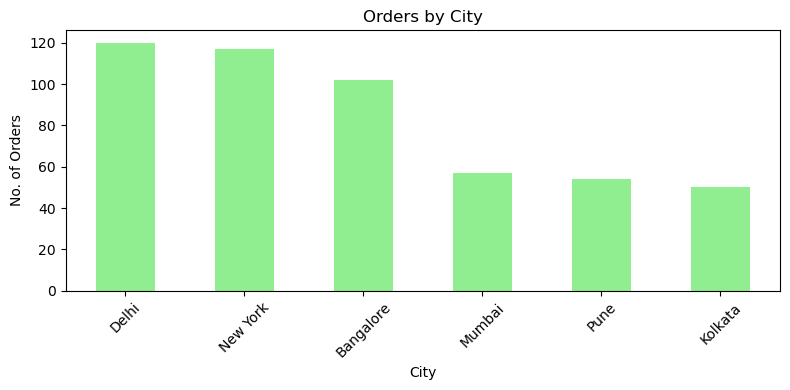

In [30]:
# 2. Orders by City
plt.figure(figsize=(8,4))
city_orders.plot(kind='bar', color='lightgreen')
plt.title("Orders by City")
plt.ylabel("No. of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

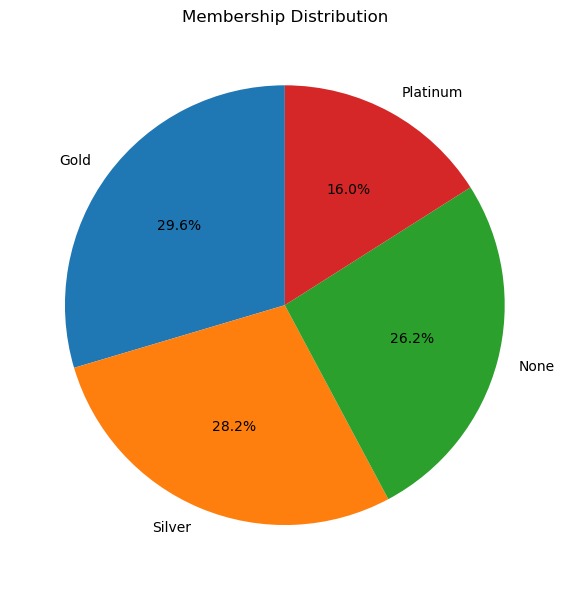

In [31]:
# 3. Membership Pie Chart
plt.figure(figsize=(6,6))
membership_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Membership Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

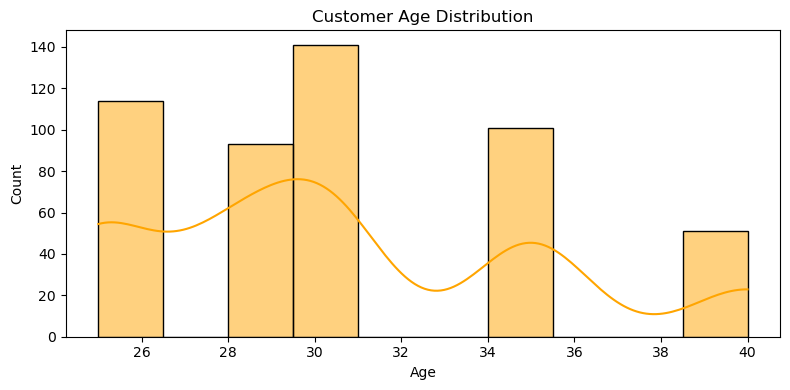

In [32]:
# 4. Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(df["Age"], bins=10, kde=True, color='orange')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

# Recommendation

## ✅ 📊 Product-wise Sales Recommendations

🔝 Top-Selling Products:
Laptop – ₹117,050

Mobile – ₹98,450

👉 Recommendations:

These are your high-ticket items. Run combo offers, EMI plans, or extended warranty schemes on these products.

Bundle accessories (like Mouse, Charger, Headphones) with these to increase average order value.

Create personalized product suggestions like “Frequently Bought Together.”



## 📉 Medium to Low-Selling Products:

Products like Tablet, Keyboard, and Headphones have relatively lower sales.

👉 Recommendations:

Launch limited-time discounts, bundle deals, or Buy 1 Get 1 offers to push these items.

Highlight these products on the homepage or top banners of the website/app.

## ✅ 📍 City-wise Orders Recommendations

🏙️ Top Performing Cities:
Delhi – 120 orders

New York – 117 orders

👉 Recommendations:

Offer fast delivery, exclusive city-based coupons, or VIP service for customers in these cities.

Run geo-targeted ads or use local influencers to maintain dominance in these markets.

## 📉 Cities with Lower Orders:

Mumbai (57), Pune (54), Kolkata (50) have noticeably fewer orders.

👉 Recommendations:

Launch city-specific campaigns with first-order discounts (e.g., ₹200 off).

Use regional language ads and localized offers to increase engagement.

## 💳 Membership-Based Recommendations

A large number of users (131) have no membership, so targeted upgrade offers like ₹200 off or free delivery should be promoted. Silver members (141) can be upsold to Gold through limited-time deals and exclusive benefits. Platinum has the lowest count (80), so it needs better visibility with VIP perks like early access and loyalty rewards. A structured tier-based loyalty program can help drive user engagement and membership upgrades.